#### Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from pprint import pprint

SEED = 42

#### Download data + description of data

In [421]:
df = pd.read_csv('sample_processed.csv')

In [422]:
df.head()

,CLIENT_ID,TARGET,l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8,...,av_diff_visit_l_186,av_diff_visit_l_187,weekday_0_visit_domain,weekday_1_visit_domain,weekday_2_visit_domain,weekday_3_visit_domain,weekday_4_visit_domain,weekday_5_visit_domain,weekday_6_visit_domain,url_visits_domain
0,u_1,0,0,0,0,0,0,0,0,0,...,8,8.0,0,0,0,2,0,0,0,2
1,u_2,0,0,0,0,0,0,0,0,0,...,8,8.0,2,17,15,25,33,0,0,3
2,u_3,0,0,0,0,0,0,0,0,0,...,8,8.0,3,0,0,0,0,0,0,1
3,u_4,0,0,0,0,0,0,0,0,0,...,8,8.0,0,0,0,0,0,0,1,1
4,u_5,0,0,0,0,0,0,0,0,0,...,8,8.0,2,0,1,0,0,0,0,1


In [654]:
X = df.drop(['CLIENT_ID', 'TARGET'], axis=1)
y = df.TARGET

In [655]:
X.shape

(4881, 1141)

In [656]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)


Отбор фичей

In [657]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [662]:
from sklearn.feature_selection import SelectFromModel

def cb_feature_importance(X, y, k=None):
    if not k:
        k = len(list(X.columns))
    # Build a random forest classifier
    model = CatBoostClassifier(iterations=500, auto_class_weights='Balanced', verbose=False, random_state=SEED)

    model.fit(X_train, y_train)
    # Get the feature importances
    importances = model.get_feature_importance()

    # Sort the importances in descending order
    sorted_indexes = np.argsort(importances)[::-1]

    # Get the names of the features
    feature_names = list(X.columns)

    # Select the top k features
    top_k_features = [feature_names[i] for i in sorted_indexes[:k] if importances[i] > 0]
    k = len(top_k_features)

    # Print the top k features
    print(f'Top {k} features: {top_k_features}')

    # Plot the feature importances
    plt.figure(figsize=(10, 5))
    plt.bar(range(k), importances[sorted_indexes[:k]])
    plt.xticks(range(k), top_k_features, rotation=90)
    plt.show()
    return top_k_features



Top 50 features: ['last_visit_domain', 'total_visits_domain', 'last_visit_l_130', 'weekday_3_visit_domain', 'weekday_4_visit_domain', 'weekday_0_visit_domain', 'average_visits_per_day_domain', 'visits_2_day_ago_domain', 'weekday_5_visit_domain', 'weekday_6_visit_domain', 'last_visit_l_80', 'weekday_1_visit_domain', 'av_diff_visit_domain', 'average_visits_domain', 'visits_1_day_ago_domain', 'visits_3_day_ago_domain', 'url_visits_domain', 'last_visit_l_182', 'weekday_2_visit_domain', 'n1_active_days_domain', 'total_visits_l_130', 'last_visit_l_136', 'average_visits_l_182', 'average_visits_l_136', 'last_visit_l_129', 'n1_active_days_l_130', 'last_visit_l_47', 'last_visit_l_100', 'average_visits_l_130', 'last_visit_l_67', 'last_visit_l_50', 'l_109', 'av_diff_visit_l_100', 'last_visit_l_109', 'l_130', 'average_visits_l_100', 'last_visit_l_12', 'n1_active_days_l_109', 'total_visits_l_182', 'n1_active_days_l_12', 'av_diff_visit_l_130', 'n3_active_days_domain', 'average_visits_l_109', 'n2_acti

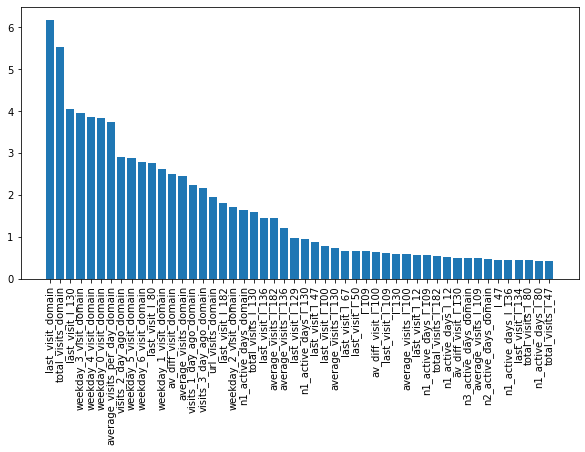

In [663]:
top_k_features = cb_feature_importance(X_train, y_train, 50)

In [664]:
top_k_features

['last_visit_domain',
 'total_visits_domain',
 'last_visit_l_130',
 'weekday_3_visit_domain',
 'weekday_4_visit_domain',
 'weekday_0_visit_domain',
 'average_visits_per_day_domain',
 'visits_2_day_ago_domain',
 'weekday_5_visit_domain',
 'weekday_6_visit_domain',
 'last_visit_l_80',
 'weekday_1_visit_domain',
 'av_diff_visit_domain',
 'average_visits_domain',
 'visits_1_day_ago_domain',
 'visits_3_day_ago_domain',
 'url_visits_domain',
 'last_visit_l_182',
 'weekday_2_visit_domain',
 'n1_active_days_domain',
 'total_visits_l_130',
 'last_visit_l_136',
 'average_visits_l_182',
 'average_visits_l_136',
 'last_visit_l_129',
 'n1_active_days_l_130',
 'last_visit_l_47',
 'last_visit_l_100',
 'average_visits_l_130',
 'last_visit_l_67',
 'last_visit_l_50',
 'l_109',
 'av_diff_visit_l_100',
 'last_visit_l_109',
 'l_130',
 'average_visits_l_100',
 'last_visit_l_12',
 'n1_active_days_l_109',
 'total_visits_l_182',
 'n1_active_days_l_12',
 'av_diff_visit_l_130',
 'n3_active_days_domain',
 'averag

In [665]:
from catboost import CatBoostClassifier, Pool
from sklearn.feature_selection import RFE

In [666]:
def select_features_rfe(X, y, num_features):
    # Create an RFE selector
    model = CatBoostClassifier(iterations=200, auto_class_weights='Balanced', verbose=False, random_state=SEED)
    selector = RFE(estimator=model, n_features_to_select=num_features)
    # Fit the selector to the data
    selector.fit(X, y)
    # Get the selected features

    return selector

In [667]:
selec_rfe = select_features_rfe(X_train[top_k_features], y_train, 30)

In [669]:
best_features = list(X[top_k_features].iloc[:,selec_rfe.support_].columns)
#best_features = list(X[top_k_features].columns)

In [670]:
# logreg = make_pipeline(StandardScaler(), LogisticRegression()).set_params(**log_reg_params)
# brf = BalancedRandomForestClassifier().set_params(**brf_params)
# rusb = RUSBoostClassifier().set_params(**rusboost_params)
# xgbrf = XGBRFClassifier().set_params(**xgbrf_params)
# catb = CatBoostClassifier().set_params(**cb_params)

In [671]:
best_features

['last_visit_domain',
 'total_visits_domain',
 'last_visit_l_130',
 'weekday_3_visit_domain',
 'weekday_4_visit_domain',
 'weekday_0_visit_domain',
 'average_visits_per_day_domain',
 'visits_2_day_ago_domain',
 'weekday_5_visit_domain',
 'weekday_6_visit_domain',
 'last_visit_l_80',
 'weekday_1_visit_domain',
 'av_diff_visit_domain',
 'average_visits_domain',
 'visits_1_day_ago_domain',
 'visits_3_day_ago_domain',
 'url_visits_domain',
 'last_visit_l_182',
 'weekday_2_visit_domain',
 'n1_active_days_domain',
 'total_visits_l_130',
 'last_visit_l_136',
 'average_visits_l_182',
 'average_visits_l_136',
 'last_visit_l_129',
 'last_visit_l_47',
 'last_visit_l_100',
 'last_visit_l_50',
 'last_visit_l_109',
 'total_visits_l_80']

In [672]:
X_train = X_train[best_features]
X_test = X_test[best_features]

In [673]:
param_distributions_lr = {'logisticregression__C': np.logspace(-3, 3, 7),
                       'logisticregression__penalty': ['l1', 'l2'],
                       'logisticregression__class_weight': ['balanced', 'None'],
                       'logisticregression__random_state': [42],
                       'logisticregression__solver': ['lbfgs', 'liblinear']
                        }
param_distributions_brf = {'n_estimators': np.arange(50, 201, 50),
                       'max_depth': [None, 5, 10, 15],
                       'class_weight': ['balanced', 'balanced_subsample'],
                       'random_state': [42]
                       }
param_distributions_xgb = {'max_depth': np.arange(3, 10, 2),
                       'learning_rate': np.linspace(0.1, 1, 5),
                       'n_estimators': np.arange(50, 201, 50),
                       'class_weight': ['balanced', 'None'],
                       'random_state': [42]}
param_distributions_rusboost = {'n_estimators': np.arange(50, 201, 50),
                       'learning_rate': np.linspace(0.1, 1, 5),
                       'random_state': [42]}

param_grid_cb = {
    'learning_rate': [0.01, 0.1, 0.001],
    'depth': [3, 6, 7],
    'l2_leaf_reg': [3, 5, 7],
    #'iterations': [100, 500, 1000, 2000],
    'iterations': [100, 200, 500],
    'auto_class_weights': ['Balanced'],
    'random_state': [42]
}

In [674]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np

def select_hyperparameters(model, X, y, param_distributions):
    # Create a random search object
    random_search = GridSearchCV(model, param_distributions, cv=StratifiedKFold(n_splits=3, shuffle=True), n_jobs=-1, verbose=2, scoring='roc_auc')

    # Fit the random search object to the data
    random_search.fit(X, y)

    # Return the best hyperparameters
    return random_search.best_params_

In [675]:
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBRFClassifier
from imblearn.ensemble import RUSBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn


In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
log_reg_params = select_hyperparameters(pipe, X_train.fillna(0), y_train, param_distributions_lr)

In [677]:
log_reg_params

{'logisticregression__C': 0.1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'liblinear'}

In [678]:
brf_params = select_hyperparameters(BalancedRandomForestClassifier(), X_train.fillna(0), y_train, param_distributions_brf)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


In [679]:
brf_params

{'class_weight': 'balanced_subsample',
 'max_depth': 5,
 'n_estimators': 150,
 'random_state': 42}

In [680]:
xgbrf_params = select_hyperparameters(XGBRFClassifier(), X_train, y_train, param_distributions_xgb)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


In [681]:
xgbrf_params

{'class_weight': 'balanced',
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'random_state': 42}

In [682]:
rusboost_params = select_hyperparameters(RUSBoostClassifier(), X_train.fillna(0), y_train, param_distributions_rusboost)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [683]:
rusboost_params

{'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}

In [684]:
# pip install catboost

In [685]:
from catboost import CatBoostClassifier

In [687]:
cb_params = select_hyperparameters(CatBoostClassifier(verbose=False), X_train, y_train, param_grid_cb)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [688]:
cb_params

{'auto_class_weights': 'Balanced',
 'depth': 7,
 'iterations': 100,
 'l2_leaf_reg': 7,
 'learning_rate': 0.001,
 'random_state': 42}

In [689]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

********************
Logistic Regression
********************
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       955
           1       0.03      0.59      0.07        22

    accuracy                           0.62       977
   macro avg       0.51      0.61      0.41       977
weighted avg       0.96      0.62      0.75       977



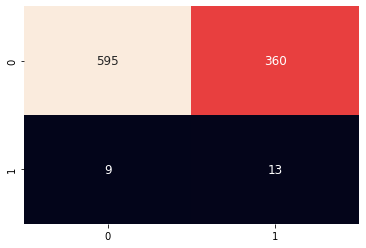

In [690]:
model_LR = make_pipeline(StandardScaler(), LogisticRegression()).set_params(**log_reg_params).fit(X_train.fillna(0), y_train)
preds_LR = model_LR.predict(X_test.fillna(0))
prob_preds_LR = model_LR.predict_proba(X_test.fillna(0))[::,1]

print('*'*20)
print("Logistic Regression")
print('*'*20)
print(classification_report(y_test, preds_LR,zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_LR), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

********************
Balanced Random Forest
********************
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       955
           1       0.03      0.68      0.06        22

    accuracy                           0.54       977
   macro avg       0.51      0.61      0.38       977
weighted avg       0.97      0.54      0.68       977



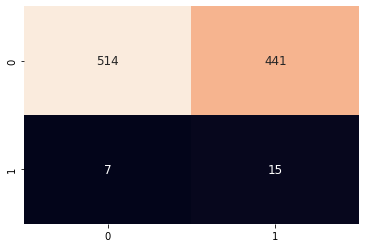

In [691]:
model_BRF = BalancedRandomForestClassifier().set_params(**brf_params).fit(X_train.fillna(0), y_train)
preds_BRF = model_BRF.predict(X_test.fillna(0))
prob_preds_BRF = model_BRF.predict_proba(X_test.fillna(0))[::,1]

print('*'*20)
print("Balanced Random Forest")
print('*'*20)
print(classification_report(y_test, preds_BRF, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_BRF), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False)

********************
Imblearn RUSBoost
********************
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       955
           1       0.04      0.45      0.07        22

    accuracy                           0.73       977
   macro avg       0.51      0.60      0.46       977
weighted avg       0.96      0.73      0.83       977



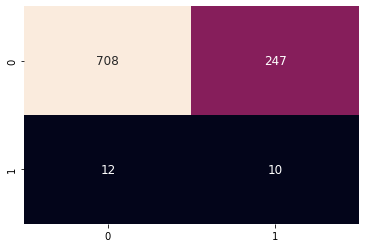

In [692]:
model_RUSBoost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                                    random_state=0).set_params(**rusboost_params).fit(X_train.fillna(0), y_train)

preds_RUSBoost = model_RUSBoost.predict(X_test.fillna(0))
prob_preds_RUSBoost = model_RUSBoost.predict_proba(X_test.fillna(0))[::,1]

print('*'*20)
print("Imblearn RUSBoost")
print('*'*20)
print(classification_report(y_test, preds_RUSBoost, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_RUSBoost), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

********************
XGB Classifier
********************
              precision    recall  f1-score   support

           0       0.98      0.43      0.59       955
           1       0.03      0.68      0.05        22

    accuracy                           0.43       977
   macro avg       0.50      0.55      0.32       977
weighted avg       0.96      0.43      0.58       977



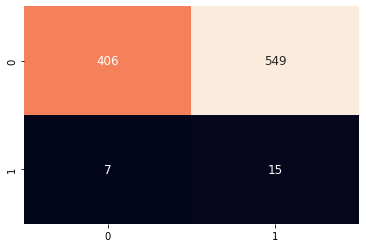

In [693]:
model_XGB = XGBRFClassifier(scale_pos_weight=50, use_label_encoder=False).set_params(**xgbrf_params).fit(X_train, y_train)
preds_XGB = model_XGB.predict(X_test)
prob_preds_XGB = model_XGB.predict_proba(X_test)[::,1]

print('*'*20)
print("XGB Classifier")
print('*'*20)
print(classification_report(y_test, preds_XGB, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_XGB), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

0:	learn: 0.6930991	total: 3.99ms	remaining: 395ms
1:	learn: 0.6930417	total: 8.11ms	remaining: 397ms
2:	learn: 0.6929541	total: 11.7ms	remaining: 379ms
3:	learn: 0.6928317	total: 15.6ms	remaining: 375ms
4:	learn: 0.6926963	total: 19.7ms	remaining: 375ms
5:	learn: 0.6926482	total: 23.1ms	remaining: 362ms
6:	learn: 0.6925774	total: 26.8ms	remaining: 357ms
7:	learn: 0.6925152	total: 30.4ms	remaining: 349ms
8:	learn: 0.6924054	total: 34.2ms	remaining: 346ms
9:	learn: 0.6922410	total: 41.6ms	remaining: 374ms
10:	learn: 0.6920529	total: 45.2ms	remaining: 366ms
11:	learn: 0.6919097	total: 49ms	remaining: 360ms
12:	learn: 0.6917914	total: 52.7ms	remaining: 353ms
13:	learn: 0.6916818	total: 56.5ms	remaining: 347ms
14:	learn: 0.6915582	total: 60.2ms	remaining: 341ms
15:	learn: 0.6915052	total: 63.7ms	remaining: 334ms
16:	learn: 0.6913257	total: 67.3ms	remaining: 329ms
17:	learn: 0.6912443	total: 70.9ms	remaining: 323ms
18:	learn: 0.6911220	total: 74.5ms	remaining: 318ms
19:	learn: 0.6910833	tot

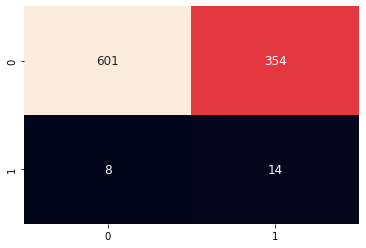

In [694]:
model_catb = CatBoostClassifier().set_params(**cb_params).fit(X_train, y_train)
#model_catb = CatBoostClassifier().fit(X_train, y_train)
preds_catb = model_catb.predict(X_test)
prob_preds_catb = model_catb.predict_proba(X_test)[::,1]

print('*'*20)
print("CatBoost classifier")
print('*'*20)
print(classification_report(y_test, preds_catb, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_catb), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

               model ROC_AUC
    LinearRegression 0.6842217991432651
BalancedRandomForest 0.6207282246549263
             XGBoost 0.611470728224655
 Imbalanced RUSBoost 0.6232032365540219
            CatBoost 0.6735364112327463


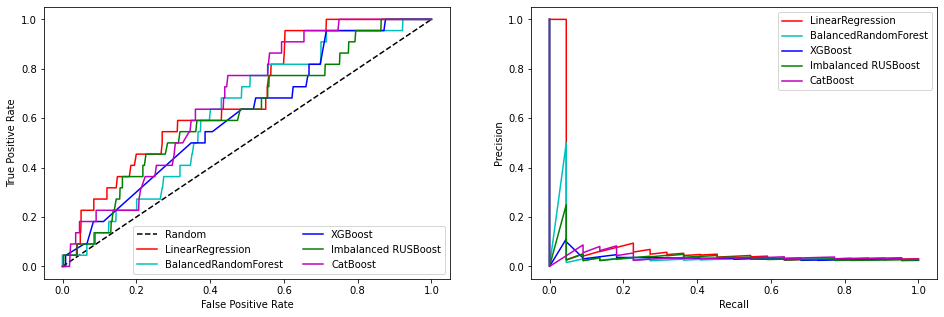

In [695]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))

models = ['LinearRegression', 'BalancedRandomForest', 'XGBoost', 'Imbalanced RUSBoost', 'CatBoost']
#models = ['LinearRegression', 'BalancedRandomForest', 'XGBoost', 'Imbalanced RUSBoost']
preds = [prob_preds_LR, prob_preds_BRF, prob_preds_XGB, prob_preds_RUSBoost, prob_preds_catb]
#preds = [prob_preds_LR, prob_preds_BRF, prob_preds_XGB, prob_preds_RUSBoost]
colors = 'rcbgm'

ax[0].plot([0, 1], [0, 1], ls='--', label='Random', c='k')

print(f"{'model':>20} {'ROC_AUC'}")
for model, pred, c in zip(models, preds, colors):
    print(f"{model:>20} {roc_auc_score(y_test, pred)}")
    fpr, tpr, _ = roc_curve(y_test, pred)
    ax[0].plot(fpr, tpr, label=model, c=c)
    
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ax[1].plot(recall, precision, label=model, c=c)


ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

ax[0].legend(ncol=2)
ax[1].legend()

In [696]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, balanced_accuracy_score, recall_score, precision_score, f1_score

In [697]:
thrs = np.linspace(0, 1, 100)

In [698]:
def plot_thr_prf(prob_preds):
    plt.plot(thrs, [balanced_accuracy_score(y_test, (prob_preds > thr).astype(int)) for thr in thrs], label="Balanced Accuracy")
    plt.plot(thrs, [recall_score(y_test, (prob_preds > thr).astype(int)) for thr in thrs], label="Recall")
    plt.plot(thrs, [precision_score(y_test, (prob_preds > thr).astype(int), zero_division=0) for thr in thrs], label="Precision")
    plt.plot(thrs, [f1_score(y_test, (prob_preds > thr).astype(int), zero_division=0) for thr in thrs], label="F1-score")
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend()
    plt.show()

In [699]:
models = [model_LR, model_BRF, model_RUSBoost, model_XGB, model_catb]
name_models = ['model_LR', 'model_BRF', 'model_RUSBoost', 'model_XGB', 'model_catb']

model_LR


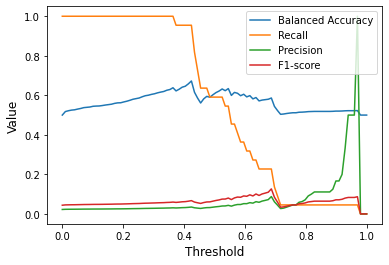

model_BRF


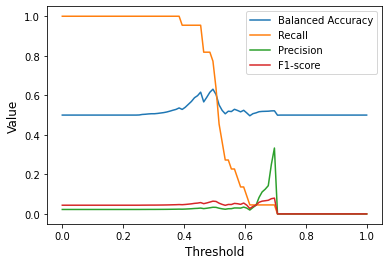

model_RUSBoost


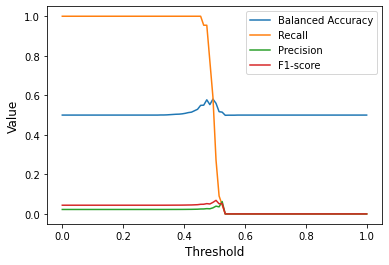

model_XGB


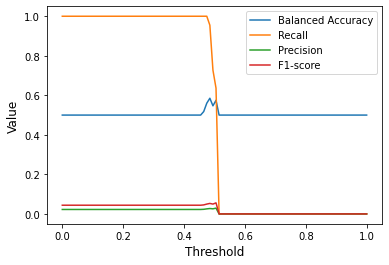

model_catb


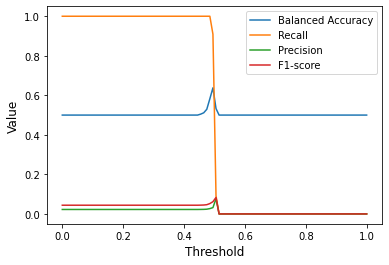

In [700]:
for name, model in zip(name_models, models):
    print(name)
    try:
        plot_thr_prf(model.predict_proba(X_test)[::,1])
    except ValueError:
        plot_thr_prf(model.predict_proba(X_test.fillna(0))[::,1])

In [ ]:
thr=0.02
print(recall_score(y_test, (prob_preds_LR > thr).astype(int)))
print(precision_score(y_test, (prob_preds_LR > thr).astype(int)))